In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy.stats import norm
from scipy.stats import t
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy.stats import ttest_ind
plt.style.use('ggplot')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [45]:
#Loading the dataset
data_frame = pd.read_csv('Insurance.csv',  header=[0], index_col=[0])
data_frame.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
id                                                                              
1     Male   44                1           28                   0   > 2 Years   
2     Male   76                1            3                   0    1-2 Year   
3     Male   47                1           28                   0   > 2 Years   
4     Male   21                1           11                   1    < 1 Year   
5   Female   29                1           41                   1    < 1 Year   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
id                                                                          
1             Yes           40454                    26      217         1  
2              No           33536                    26      183         0  
3             Yes           38294                    26       27         1  
4              No           28619                   152      203         0  
5              No           27496                   152       39         0

In [46]:
#To check the columns of the dataset
data_frame.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [47]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20799 entries, 1 to 20799
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                20799 non-null  object
 1   Age                   20799 non-null  int64 
 2   Driving_License       20799 non-null  int64 
 3   Region_Code           20799 non-null  int64 
 4   Previously_Insured    20799 non-null  int64 
 5   Vehicle_Age           20799 non-null  object
 6   Vehicle_Damage        20799 non-null  object
 7   Annual_Premium        20799 non-null  int64 
 8   Policy_Sales_Channel  20799 non-null  int64 
 9   Vintage               20799 non-null  int64 
 10  Response              20799 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.9+ MB


In [48]:
data_frame['Response'].value_counts()

0    18216
1     2583
Name: Response, dtype: int64

In [49]:
data_frame['Response'].value_counts()

0    18216
1     2583
Name: Response, dtype: int64

# EDA

In [50]:
df_eda = data_frame[['Gender', 'Driving_License', 'Previously_Insured','Vehicle_Damage', 'Vehicle_Age','Response']]

The features 'Gender', 'Driving_License', 'Previously_Insured','Vehicle_Damage' and 'Vehicle_Age' shows a clear dstinction between Response 0 and 1

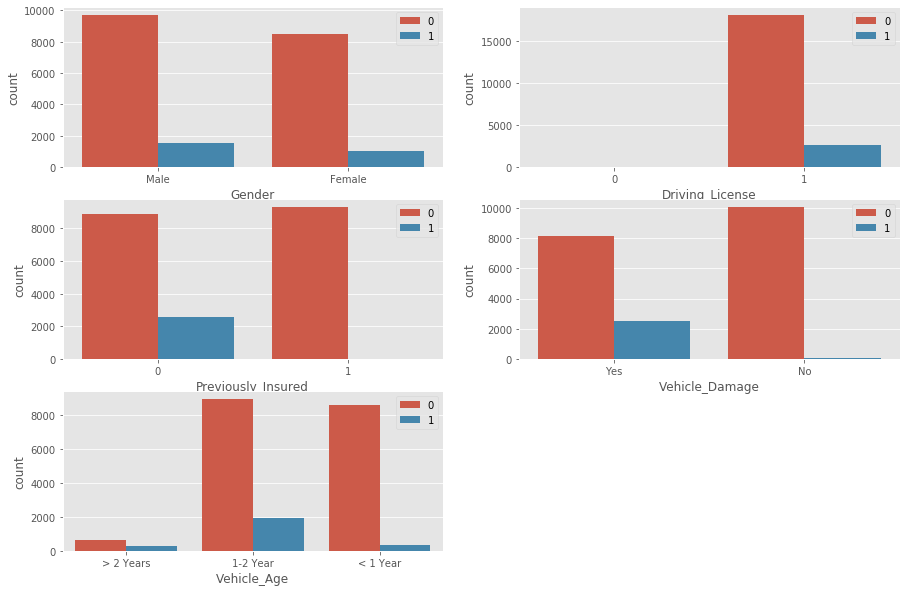

In [51]:
plt.figure(figsize=(15,10))
for i in range(1,6):
    plt.subplot(3,2,i)
    
    sns.countplot(x=df_eda.iloc[:,i-1], hue='Response', data=df_eda,)
    plt. legend(loc='upper right')

 Various region codes shows a clear distinction between Responses 0 and 1. Regions 8 and 28 have a lot of people buying vehicle insurance

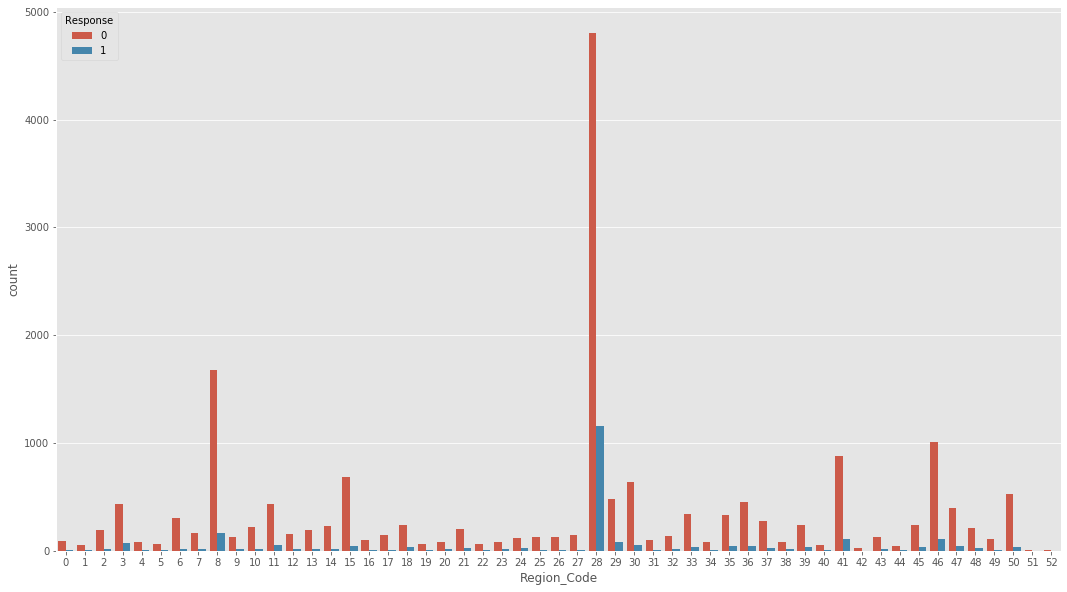

In [52]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Region_Code', hue='Response', data=data_frame)#, palette=["#9b59b6", "#3498db"])
plt.show()

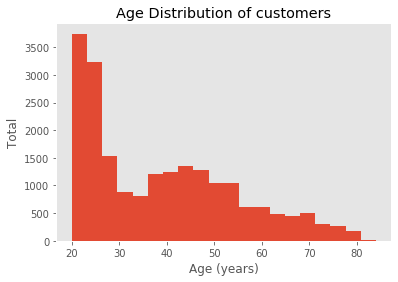

In [53]:
data_frame['Age'].hist(bins=20, grid=False)  # adjust bin width to 5
plt.title("Age Distribution of customers")
plt.xlabel('Age (years)')
plt.ylabel('Total');

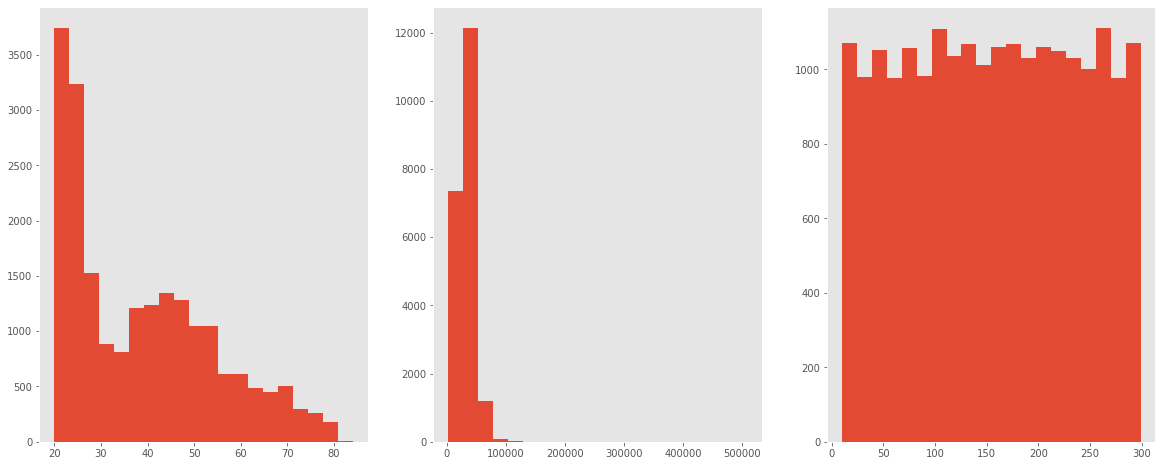

In [54]:
df_dist = data_frame[['Age', 'Annual_Premium', 'Vintage']]
plt.figure(figsize=(20,8))
for i in range(1,4):
    plt.subplot(1,3,i)
    df_dist.iloc[:,i-1].hist(bins=20, grid=False)
     

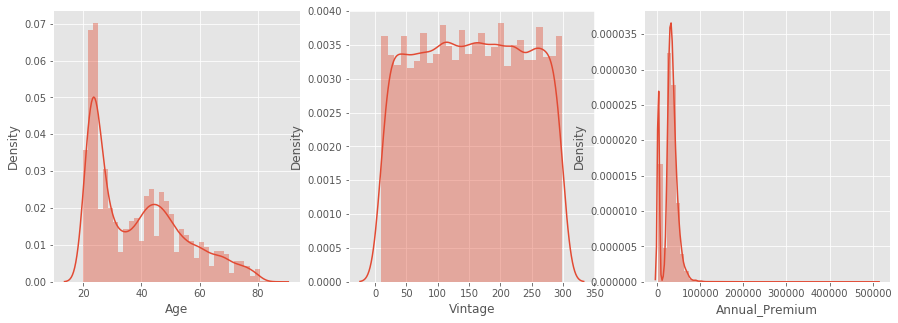

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(data_frame['Age'],kde=True)
plt.subplot(1,3,2)
sns.distplot(data_frame['Vintage'],kde=True)
plt.subplot(1,3,3)
sns.distplot(data_frame['Annual_Premium'],kde=True)

Annual Premium is highly skewed. Hence log transfotrmation has to be done

In [56]:
data_frame['Annual_Premium'] =np.log(data_frame['Annual_Premium'])

In [57]:
data_frame['Policy_Sales_Channel'].nunique()

109

In [58]:
data_frame.drop('Policy_Sales_Channel', axis=1, inplace=True)

# Hypothesis Testing

In [59]:
# t-Test
## Is there any significant difference between male and female in the Annual premium paid

data1 = data_frame['Annual_Premium'][data_frame['Gender'] =='Male']
data2 = data_frame['Annual_Premium'][data_frame['Gender'] =='Female']
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

# interpret via critical value
if abs(p) >= .05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-0.794, p=0.427
Accept null hypothesis that the means are equal.


In [60]:
# t-Test
#Is there any significant difference between those who bought vehicle insurance and those who did not buy vehicle insurance in the Annual premium paid

data1 = data_frame['Annual_Premium'][data_frame['Response'] ==1]
data2 = data_frame['Annual_Premium'][data_frame['Response'] ==0]
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

# interpret via critical value
if abs(p) >= .05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')



t=1.067, p=0.286
Accept null hypothesis that the means are equal.


In [61]:
#Anova
import scipy.stats as stats

stats.f_oneway(data_frame['Annual_Premium'][data_frame['Age'] <= 30],
               data_frame['Annual_Premium'][(data_frame['Age'] >= 30) & (data_frame['Age'] <= 50)],
               data_frame['Annual_Premium'][data_frame['Age'] >= 50])

F_onewayResult(statistic=32.84693485123904, pvalue=5.7092759103637164e-15)

# Cleaning the data


In [63]:
# Convert 'Gender', Driving_License ', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response' into categorical variable

data_frame[['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']] = data_frame[['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']].astype('category') 


In [64]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20799 entries, 1 to 20799
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              20799 non-null  category
 1   Age                 20799 non-null  int64   
 2   Driving_License     20799 non-null  category
 3   Region_Code         20799 non-null  category
 4   Previously_Insured  20799 non-null  category
 5   Vehicle_Age         20799 non-null  category
 6   Vehicle_Damage      20799 non-null  category
 7   Annual_Premium      20799 non-null  float64 
 8   Vintage             20799 non-null  int64   
 9   Response            20799 non-null  category
dtypes: category(7), float64(1), int64(2)
memory usage: 1.4 MB


In [65]:
data_frame.describe()

Age  Annual_Premium       Vintage
count  20799.000000    20799.000000  20799.000000
mean      38.844704       10.021890    154.868888
std       15.574677        1.000268     83.316034
min       20.000000        7.874739     10.000000
25%       25.000000       10.105367     83.000000
50%       36.000000       10.367976    155.000000
75%       49.000000       10.584765    226.000000
max       84.000000       13.138380    299.000000

No correlation between the variables

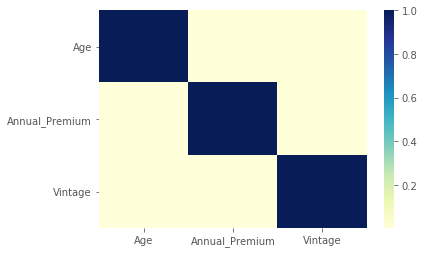

In [66]:
sns.heatmap(data_frame.corr(),cmap="YlGnBu")

In [67]:
#To find the unique count of categorical variable
data_frame['Gender'].value_counts()

Male      11256
Female     9543
Name: Gender, dtype: int64

In [68]:
data_frame['Driving_License'].value_counts()

1    20754
0       45
Name: Driving_License, dtype: int64

In [69]:
data_frame['Region_Code'].value_counts().head()

28    5965
8     1844
46    1117
41     989
15     727
Name: Region_Code, dtype: int64

In [70]:
data_frame['Previously_Insured'].value_counts()

0    11449
1     9350
Name: Previously_Insured, dtype: int64

In [71]:
data_frame['Vehicle_Age'].value_counts()

1-2 Year     10930
< 1 Year      8994
> 2 Years      875
Name: Vehicle_Age, dtype: int64

In [72]:
data_frame['Vehicle_Damage'].value_counts()

Yes    10668
No     10131
Name: Vehicle_Damage, dtype: int64

In [78]:
 data_frame['Response'].value_counts()

0    18216
1     2583
Name: Response, dtype: int64

In [79]:
 data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20799 entries, 1 to 20799
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              20799 non-null  category
 1   Age                 20799 non-null  int64   
 2   Driving_License     20799 non-null  category
 3   Region_Code         20799 non-null  category
 4   Previously_Insured  20799 non-null  category
 5   Vehicle_Age         20799 non-null  category
 6   Vehicle_Damage      20799 non-null  category
 7   Annual_Premium      20799 non-null  float64 
 8   Vintage             20799 non-null  int64   
 9   Response            20799 non-null  category
dtypes: category(7), float64(1), int64(2)
memory usage: 1.4 MB


# Dealing with categorical variables

In [80]:
dummy_df = pd.get_dummies( data_frame.iloc[:,:-1], drop_first=True)
dummy_df.head()
#len(dummy_df.columns)

Age  Annual_Premium  Vintage  Gender_Male  Driving_License_1  \
id                                                                 
1    44       10.607921      217            1                  1   
2    76       10.420375      183            1                  1   
3    47       10.553049       27            1                  1   
4    21       10.261826      203            1                  1   
5    29       10.221796       39            0                  1   

    Region_Code_1  Region_Code_2  Region_Code_3  Region_Code_4  Region_Code_5  \
id                                                                              
1               0              0              0              0              0   
2               0              0              1              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   
5               0              0              0              0              0   

    ...  Region_Code_47  Region_Code_48  Region_Code_49  Region_Code_50  \
id  ...                                                                   
1   ...               0               0               0               0   
2   ...               0               0               0               0   
3   ...               0               0               0               0   
4   ...               0               0               0               0   
5   ...               0               0               0               0   

    Region_Code_51  Region_Code_52  Previously_Insured_1  \
id                                                         
1                0               0                     0   
2                0               0                     0   
3                0               0                     0   
4                0               0                     1   
5                0               0                     1   

    Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
id                                                                   
1                      0                      1                   1  
2                      0                      0                   0  
3                      0                      1                   1  
4                      1                      0                   0  
5                      1                      0                   0  

[5 rows x 61 columns]

In [81]:
x = dummy_df
y = data_frame['Response']
x_train, x_test, y_train, y_test = tts(x, y, train_size=0.7, random_state=1, stratify=y)

### Scaling the data

In [94]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(data=x_train_scaled, columns = list(x_train.columns))

x_test_scaled = scaler.transform(x_test)
X_test = pd.DataFrame(data=x_test_scaled, columns = list(x_test.columns))

Age  Annual_Premium   Vintage  Gender_Male  Driving_License_1  \
0      0.015625        0.577268  0.740484          0.0                1.0   
1      0.500000        0.477770  0.564014          1.0                1.0   
2      0.140625        0.462224  0.276817          1.0                1.0   
3      0.453125        0.502501  0.993080          1.0                1.0   
4      0.000000        0.000000  0.349481          0.0                1.0   
...         ...             ...       ...          ...                ...   
14554  0.015625        0.478074  0.875433          0.0                1.0   
14555  0.187500        0.453412  0.314879          1.0                1.0   
14556  0.375000        0.000000  0.193772          1.0                1.0   
14557  0.078125        0.477507  0.833910          1.0                1.0   
14558  0.078125        0.496901  0.346021          1.0                1.0   

       Region_Code_1  Region_Code_2  Region_Code_3  Region_Code_4  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.0            0.0   
3                0.0            0.0            0.0            0.0   
4                0.0            0.0            0.0            0.0   
...              ...            ...            ...            ...   
14554            0.0            1.0            0.0            0.0   
14555            0.0            0.0            0.0            0.0   
14556            0.0            0.0            0.0            0.0   
14557            0.0            0.0            0.0            0.0   
14558            0.0            0.0            0.0            0.0   

       Region_Code_5  ...  Region_Code_47  Region_Code_48  Region_Code_49  \
0                0.0  ...             0.0             0.0             0.0   
1                0.0  ...             0.0             0.0             0.0   
2                0.0  ...             0.0             0.0             0.0   
3                0.0  ...             0.0             0.0             0.0   
4                0.0  ...             0.0             0.0             0.0   
...              ...  ...             ...             ...             ...   
14554            0.0  ...             0.0             0.0             0.0   
14555            0.0  ...             0.0             0.0             0.0   
14556            0.0  ...             0.0             0.0             0.0   
14557            0.0  ...             0.0             0.0             0.0   
14558            0.0  ...             0.0             0.0             0.0   

       Region_Code_50  Region_Code_51  Region_Code_52  Previously_Insured_1  \
0                 0.0             0.0             0.0                   1.0   
1                 0.0             0.0             0.0                   0.0   
2                 0.0             0.0             0.0                   1.0   
3                 0.0             0.0             0.0                   1.0   
4                 0.0             0.0             0.0                   0.0   
...               ...             ...             ...                   ...   
14554             0.0             0.0             0.0                   1.0   
14555             0.0             0.0             0.0                   0.0   
14556             0.0             0.0             0.0                   0.0   
14557             0.0             0.0             0.0                   1.0   
14558             0.0             0.0             0.0                   1.0   

       Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                       1.0                    0.0                 0.0  
1                       0.0                    1.0                 1.0  
2                       1.0                    0.0                 0.0  
3                       0.0                    0.0                 0.0  
4                  

In [95]:
from sklearn.utils import resample

# concatenate our training data back together
comb = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_insured = comb[comb.Response==0]
insured = comb[comb.Response==1]

# upsample minority
insured_upsampled = resample(insured,
                          replace=True, # sample with replacement
                          n_samples=len(not_insured), # match number in majority class
                          random_state=250) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_insured, insured_upsampled])

# check new class counts
upsampled.Response.value_counts()

1    12751
0    12751
Name: Response, dtype: int64

In [97]:
upsampled_Y = upsampled["Response"]
upsampled_X = upsampled.drop("Response", axis= 1)



# KNN Classifier

In [100]:
#model = RandomizedSearchCV(knn,params,cv=cvals)
knn= KNeighborsClassifier()
knn.fit(X_train ,y_train)
y_pred = knn.predict(X_test)

#### Confusion matrix, Classification Report and Accuracy Score

In [101]:

print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test,y_pred)*100) 


[[5173  292]
 [ 655  120]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5465
           1       0.29      0.15      0.20       775

    accuracy                           0.85      6240
   macro avg       0.59      0.55      0.56      6240
weighted avg       0.81      0.85      0.83      6240

84.82371794871794


### ROC Curve and ROC_AUC score

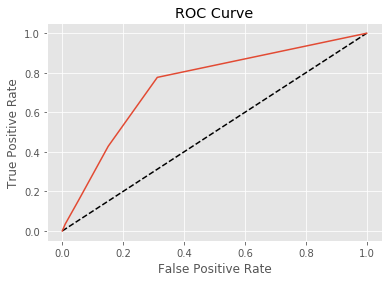

In [102]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [93]:
print(roc_auc_score(y_test, y_pred_prob))

0.7409585928046514


# Logistic Regression

In [104]:
logreg =LogisticRegression()
#logreg.fit(upsampled_X,upsampled_Y )
logreg.fit(X_train ,y_train)
y_pred = logreg.predict(X_test)

C:\IDE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Confusion matrix, Classification Report and Accuracy Score

In [105]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[5461    4]
 [ 775    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      5465
           1       0.00      0.00      0.00       775

    accuracy                           0.88      6240
   macro avg       0.44      0.50      0.47      6240
weighted avg       0.77      0.88      0.82      6240

87.51602564102564


### ROC Curve and ROC_AUC score

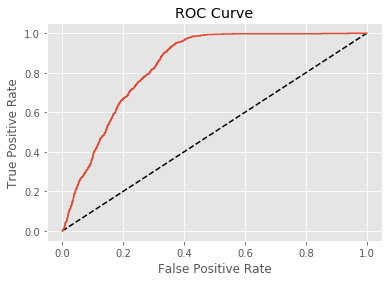

In [106]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [107]:
print(roc_auc_score(y_test, y_pred_prob))

0.8368238939881358


# Decision Tree

In [108]:
decision_tree =DecisionTreeClassifier()
#decision_tree.fit(upsampled_X,upsampled_Y )
decision_tree.fit(X_train ,y_train)
y_pred = decision_tree.predict(X_test)

In [109]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[4885  580]
 [ 544  231]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      5465
           1       0.28      0.30      0.29       775

    accuracy                           0.82      6240
   macro avg       0.59      0.60      0.59      6240
weighted avg       0.82      0.82      0.82      6240

81.98717948717949


### ROC Curve and ROC_AUC score

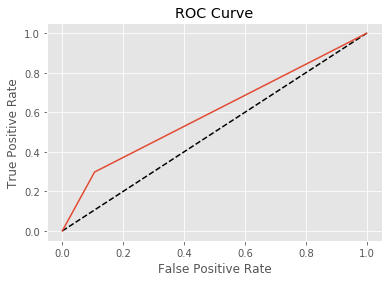

In [110]:
y_pred_prob = decision_tree.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [111]:
print(roc_auc_score(y_test, y_pred_prob))

0.5959030782398254


# Naive Bayes Classifier

In [112]:
from sklearn.model_selection import cross_val_score
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [113]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[3296 2169]
 [  68  707]]
              precision    recall  f1-score   support

           0       0.98      0.60      0.75      5465
           1       0.25      0.91      0.39       775

    accuracy                           0.64      6240
   macro avg       0.61      0.76      0.57      6240
weighted avg       0.89      0.64      0.70      6240

64.15064102564104


In [116]:
Cross_validated_ROC_AUC = cross_val_score(nb, X_train, y_train, cv=5, scoring='roc_auc').mean()
Cross_validated_ROC_AUC

0.8003093639255863

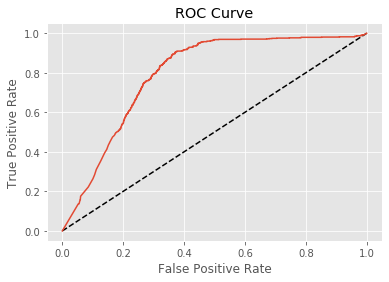

In [117]:
y_pred_prob = nb.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [118]:
print(roc_auc_score(y_test, y_pred_prob))

0.7930646046690081
